# Deriving Lyrical Features for Hit Song Prediction

## Load and Prep Data

In [1]:
#Load dataset containing songs with their spotify echonest features and lyrics
import pandas as pd
import numpy as np

df = pd.read_csv('Song Dataset with Lyrics 12-07.csv')
df = df.drop(df.columns[[0, 1, 2, 3]], axis=1)
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,duration_ms,time_signature,chorus_hit,sections,target,lyrics,tokens,lyricText,AZLyrics
0,Ear Attention Part 3,Gibi ASMR,spotify:track:1Oc5mNfIwEewCQia21C6S4,0.496,0.11700,1,-31.399,1,0.2260,0.0407,...,68.001,258578,3,25.85962,13,0,YES BECAUSE HE NEVER DID A THING LIKE THAT BEF...,"['yes', 'thing', 'like', 'ask', 'breakfast', '...",yes thing like ask breakfast bed couple egg ci...,No lyrics
1,Ear Attention Part 1,Gibi ASMR,spotify:track:4qdYR3HNR2Hdc8z1zjOkQO,0.486,0.00573,1,-33.161,1,0.1490,0.0254,...,80.030,350712,4,46.88240,19,0,YES BECAUSE HE NEVER DID A THING LIKE THAT BEF...,"['yes', 'thing', 'like', 'ask', 'breakfast', '...",yes thing like ask breakfast bed couple egg ci...,No lyrics
2,Not my tempo,Dj Mad Dog,spotify:track:2lHOqFzYNIk3AjrOlDgXSX,0.456,0.94700,2,-3.150,1,0.1920,0.0259,...,174.076,256788,4,44.68472,14,0,"\nOh shit, I guess we're starting\nThe mic is ...","['oh', 'shit', 'guess', 'starting', 'mic', 'he...",oh shit guess starting mic heart know hear voi...,No lyrics
3,Patience,Mikkel Metal,spotify:track:5cDChv1WQgXo8qJ7cyxmPE,0.459,0.14100,4,-20.608,0,0.0350,0.8790,...,99.898,422786,4,23.75564,28,0,"\nOh shit, I guess we're starting\nThe mic is ...","['oh', 'shit', 'guess', 'starting', 'mic', 'he...",oh shit guess starting mic heart know hear voi...,"Here we are, here we are, yeah\nThis one right..."
4,Just Came For The Music - Rave Mix,Billy Kenny,spotify:track:1pfL3l35qvHV0K9VJl8jq0,0.758,0.97500,2,-6.664,1,0.0666,0.0450,...,122.991,238537,4,79.42433,9,0,"\nOh shit, I guess we're starting\nThe mic is ...","['oh', 'shit', 'guess', 'starting', 'mic', 'he...",oh shit guess starting mic heart know hear voi...,No lyrics


In [2]:
#Create a new column that uses lyrics scraped from Genius for all songs that don't have lyrics scraped from AZ Lyrics

conditions = [
    (df['AZLyrics'] == 'No lyrics from AZ'),
    (df['AZLyrics'] != 'No lyrics from AZ'),
    ]
values = [df['lyrics'], df['AZLyrics']]
df['newLyrics'] = np.select(conditions, values)
df2 = df[df['newLyrics'] != 'No lyrics']
df2.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,duration_ms,time_signature,chorus_hit,sections,target,lyrics,tokens,lyricText,AZLyrics,newLyrics
3,Patience,Mikkel Metal,spotify:track:5cDChv1WQgXo8qJ7cyxmPE,0.459,0.1410,4,-20.608,0,0.0350,0.879000,...,422786,4,23.75564,28,0,"\nOh shit, I guess we're starting\nThe mic is ...","['oh', 'shit', 'guess', 'starting', 'mic', 'he...",oh shit guess starting mic heart know hear voi...,"Here we are, here we are, yeah\nThis one right...","Here we are, here we are, yeah\nThis one right..."
48,You Raise Me Up,Josh Groban & The African Children's Choir,spotify:track:4TbNLKRLKlxZDlS0pu7Lsy,0.250,0.1360,10,-12.162,1,0.0370,0.673000,...,292333,4,28.80315,12,1,Hasan Of Bassorah.\n\n\nThere was once of days...,"['hasan', 'bassorah', 'day', 'yore', 'age', 't...",hasan bassorah day yore age time long gone mer...,"When I am down and, oh my soul, so weary\nWhen...","When I am down and, oh my soul, so weary\nWhen..."
57,Stay With Me (Brass Bed),Josh Gracin,spotify:track:1DJgRkwljWXGb1sFxfSlOE,0.434,0.5670,1,-7.278,1,0.0309,0.396000,...,251133,3,33.16539,11,1,Tale of King Omar Bin Al-Nu'uman and His Sons ...,"['tale', 'king', 'omar', 'bin', 'alnuuman', 's...",tale king omar bin alnuuman son sharrkan zau a...,"Baby, the clock on the wall is lying\r\nIt's n...","Baby, the clock on the wall is lying\r\nIt's n..."
72,Falling Stars,Delle Alpi,spotify:track:6nx6oC4HgnZOxC4dgsPiIU,0.261,0.0257,1,-25.711,1,0.0406,0.956000,...,158424,5,53.58774,8,0,Tale Of Kamar Al Zaman\n\nThat there was in ti...,"['tale', 'kamar', 'al', 'zaman', 'time', 'yore...",tale kamar al zaman time yore age long gone ki...,Too much love\nI got too much love\nAs a visio...,Too much love\nI got too much love\nAs a visio...
100,Onslaught,Slaughter Lord,spotify:track:5oxYCggStQ1Hs4i7XDDtLd,0.148,0.7250,2,-13.288,1,0.0631,0.000038,...,254253,4,38.43942,11,0,"""One evening as I was lying flat on the deck o...","['evening', 'lying', 'flat', 'deck', 'steamboa...",evening lying flat deck steamboat heard voice ...,"[Royce Da 5'9""]\r\n(Yeah!) This is Slaughterho...","[Royce Da 5'9""]\r\n(Yeah!) This is Slaughterho..."


In [3]:
#Remove extraneous characters/phrases that resulted from scraping
import re
from cleantext import clean

def removeWords(lyrics):
    return re.sub("[\\[].*?[\\]]", "", lyrics)

df3 = df2[df2['newLyrics'] != '[Instrumentals]1EmbedShare URLCopyEmbedCopy']
df3['newLyrics'] = df3['newLyrics'].str.replace('embedshare urlcopyembedcopy','')
df3['newLyrics'] = df3['newLyrics'].str.replace('URLCopyEmbedCopy','')
df3['newLyrics'] = df3['newLyrics'].str.replace('EmbedShare','')
df3['newLyrics'] = df3['newLyrics'].str.replace('(2018)','')
df3["newLyrics"] = df3["newLyrics"].apply(removeWords)

df3['lyricsClean'] = df3.apply(lambda row: clean(row['newLyrics'],
    fix_unicode=True,               # fix various unicode errors
    to_ascii=True,                  # transliterate to closest ASCII representation
    lower=True,                     # lowercase text
    no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
    no_urls=True,                  # replace all URLs with a special token
    no_emails=True,                # replace all email addresses with a special token
    no_phone_numbers=True,         # replace all phone numbers with a special token
    no_numbers=False,               # replace all numbers with a special token
    no_digits=False,                # replace all digits with a special token
    no_currency_symbols=True,      # replace all currency symbols with a special token
    no_punct=True,                 # fully remove punctuation
    replace_with_url="",
    replace_with_email="",
    replace_with_phone_number="",
    replace_with_number="",
    replace_with_digit="",
    replace_with_currency_symbol="",
    lang="en"                       # set to 'de' for German special handling
), axis=1)

df4 = df3[df3['lyricsClean'] != ""]

C:\Users\mhgro\AppData\Local\Temp\ipykernel_1144\534221826.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df3['newLyrics'] = df3['newLyrics'].str.replace('(2018)','')


## Some Simple EDA

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mhgro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


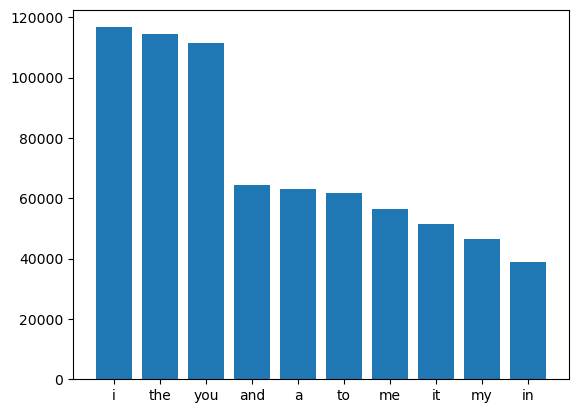

In [4]:
#Identifying most common stopwords in lyrical corpus
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt

def plotTopStopwords(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plotTopStopwords(df4['lyricsClean'])

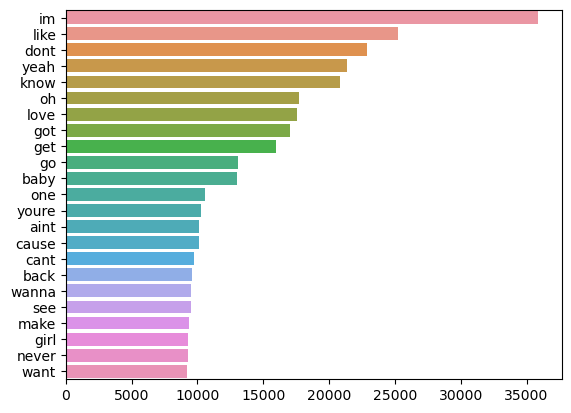

In [5]:
#Plot the most common non-stowords
import seaborn as sns
from collections import  Counter

def plotTopNonStopwords(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:60]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

plotTopNonStopwords(df4['lyricsClean'])

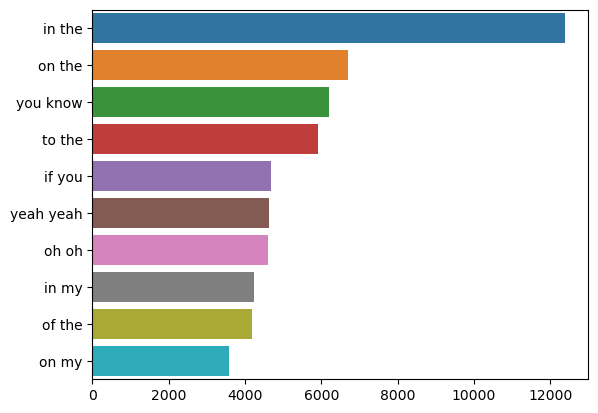

In [6]:
#Plot the most common N-grams
from sklearn.feature_extraction.text import CountVectorizer

def plotTopNgrams(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def getTopNgram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=getTopNgram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

plotTopNgrams(df4['lyricsClean'],2)

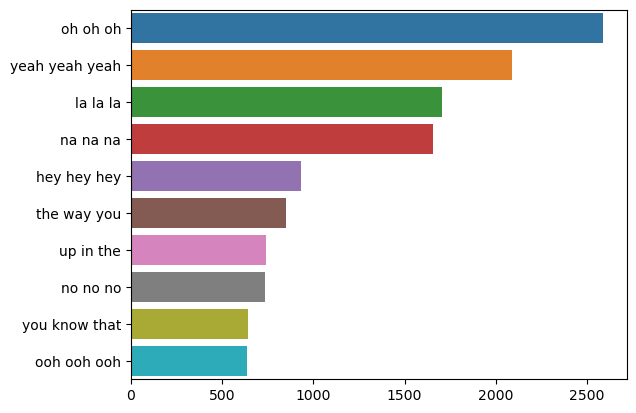

In [7]:
plotTopNgrams(df4['lyricsClean'],3)

# Deriving the Lyrical Features

In [8]:
# Determine the repetitiveness of a song by identifying how compressable the lyrics are
import zlib  
import binascii
import sys

def calcCompressibility(song):
    data = str(song).encode()
    uncompressedData = zlib.compress(data, 0)
    compressedData = zlib.compress(data, -1)
    return 100*(1-sys.getsizeof(compressedData)/sys.getsizeof(uncompressedData))

df4["Repetitiveness"] = df4["lyricsClean"].apply(calcCompressibility)

Text(0.5, 1.0, 'Most Repetitive Tracks')

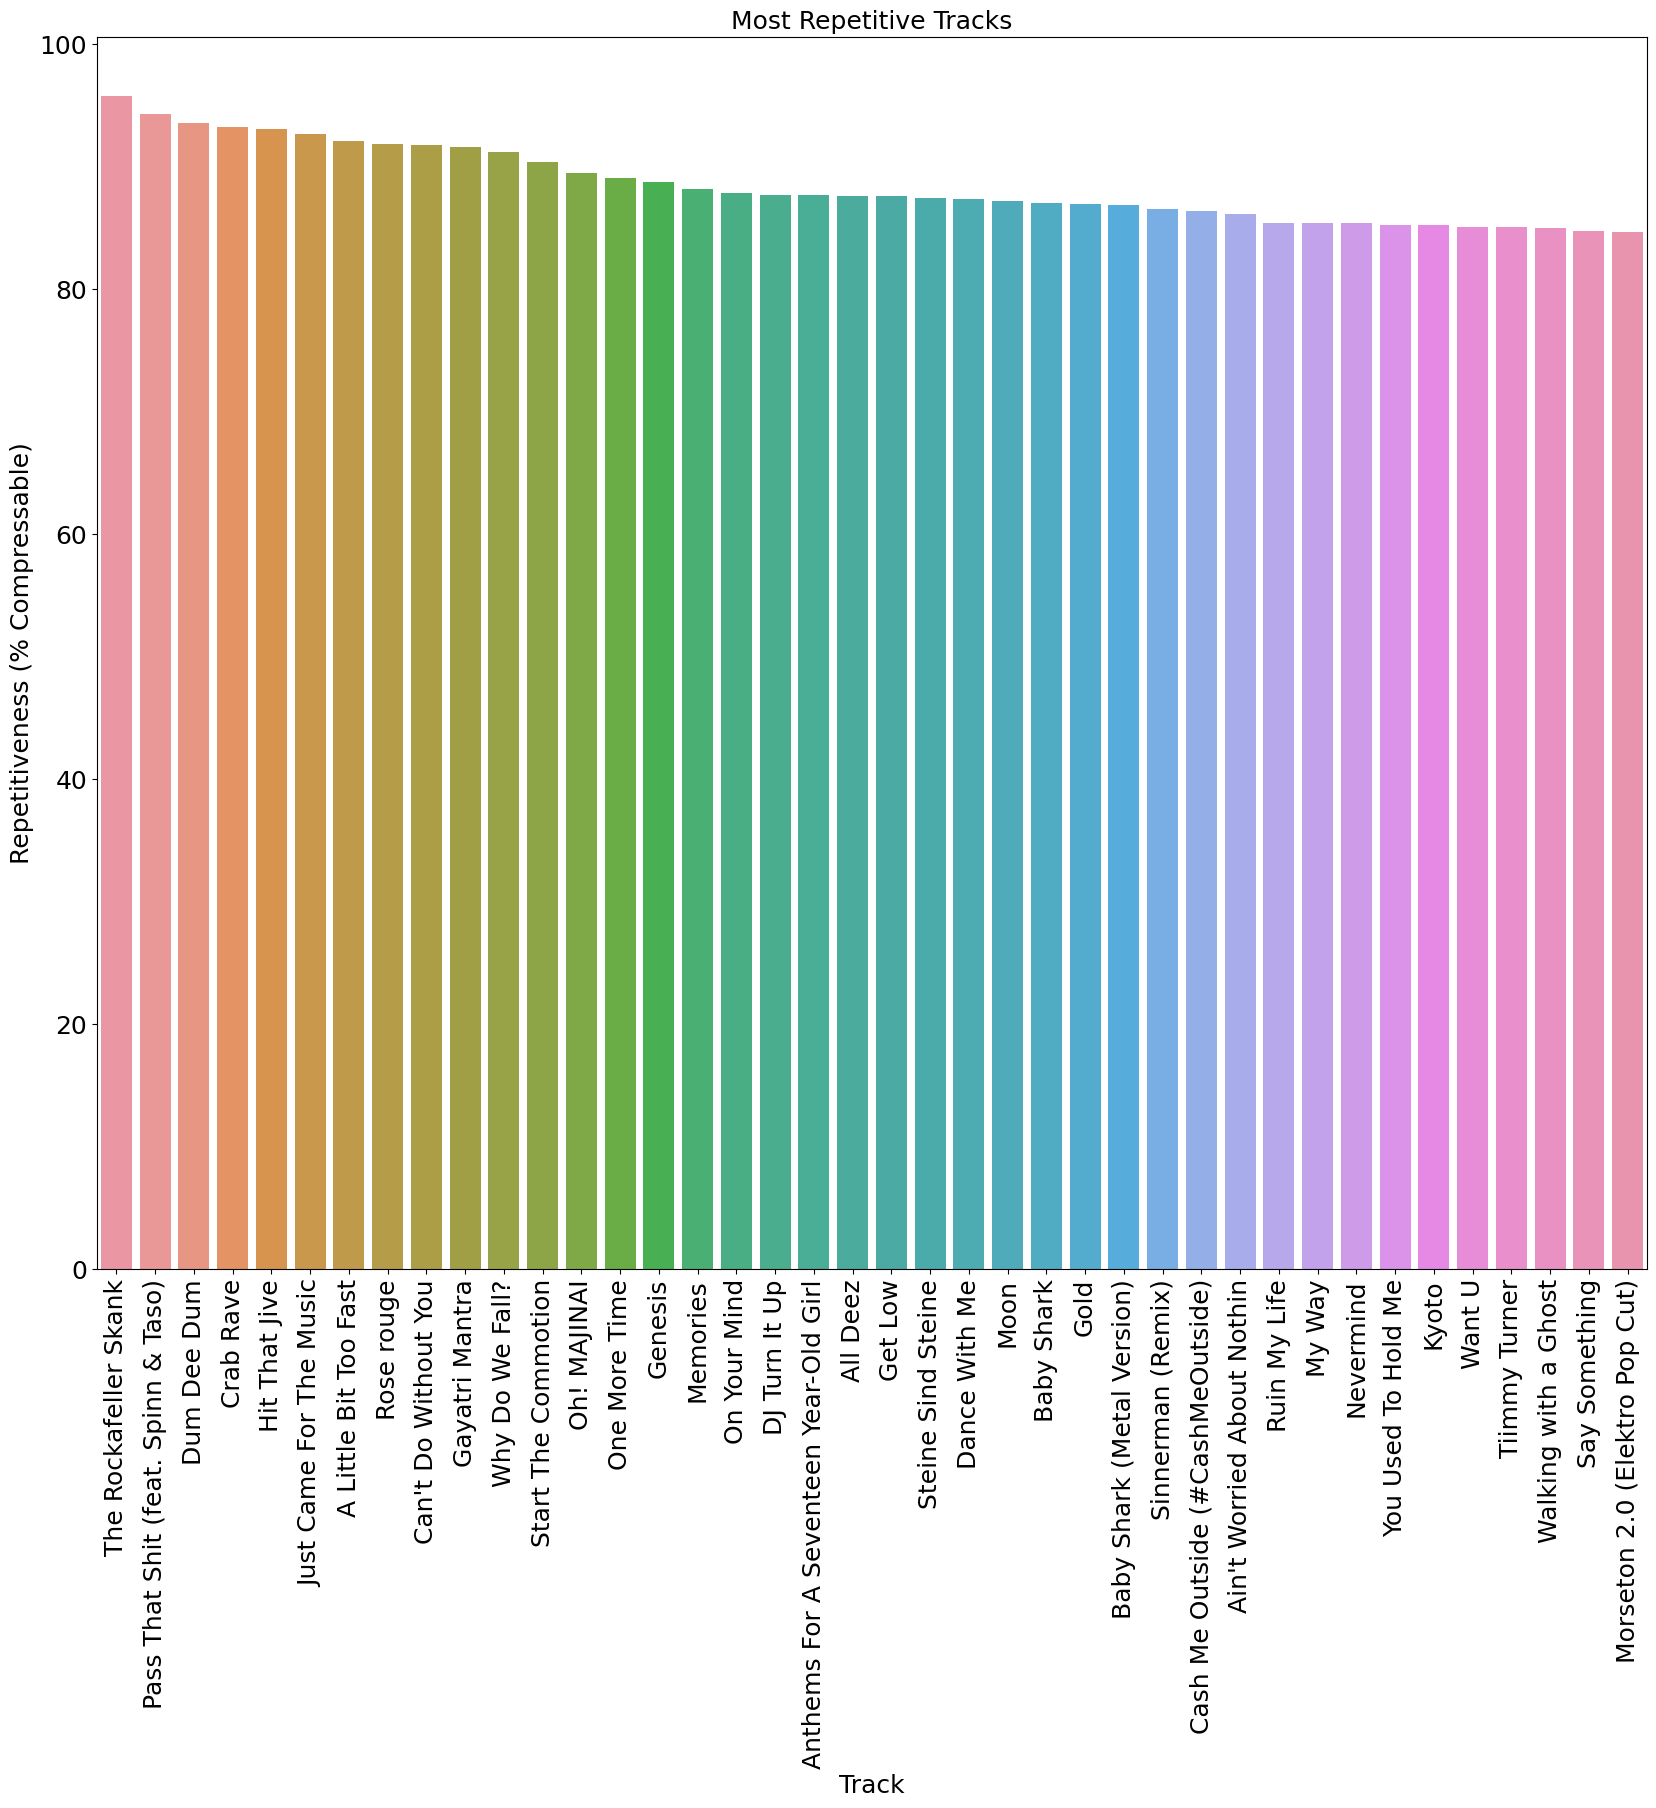

In [9]:
#Plot the most repetitive tracks

rep_df = df4[["track", "Repetitiveness"]].sort_values(by=['Repetitiveness'], ascending=False)
rep_df = rep_df.reset_index(drop=True)
rep_df = rep_df.head(40)
plt.figure(figsize=(20,16))


sns.barplot(x='track', 
            y="Repetitiveness", 
            data=rep_df, 
            order=rep_df.sort_values('Repetitiveness', ascending = False).track)

plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Track", size=18)
plt.ylabel("Repetitiveness (% Compressable)", size=18)
plt.title("Most Repetitive Tracks", size=18)
#plt.savefig('Most Repetitive Tracks.png')

In [10]:
# Create new column with average word length per song
def avgWordLength(song):
    total_words = len(song.split())
    total_letters = sum([len(a) for a in song.split()])
    return total_letters/total_words

# Add to new column, Average Word Length
df4["avgWordLength"] = df4["lyricsClean"].apply(avgWordLength)

Text(0.5, 1.0, 'Tracks with the Longest Average Word Length')

C:\Users\mhgro\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mhgro\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mhgro\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23569 (\N{CJK UNIFIED IDEOGRAPH-5C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mhgro\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


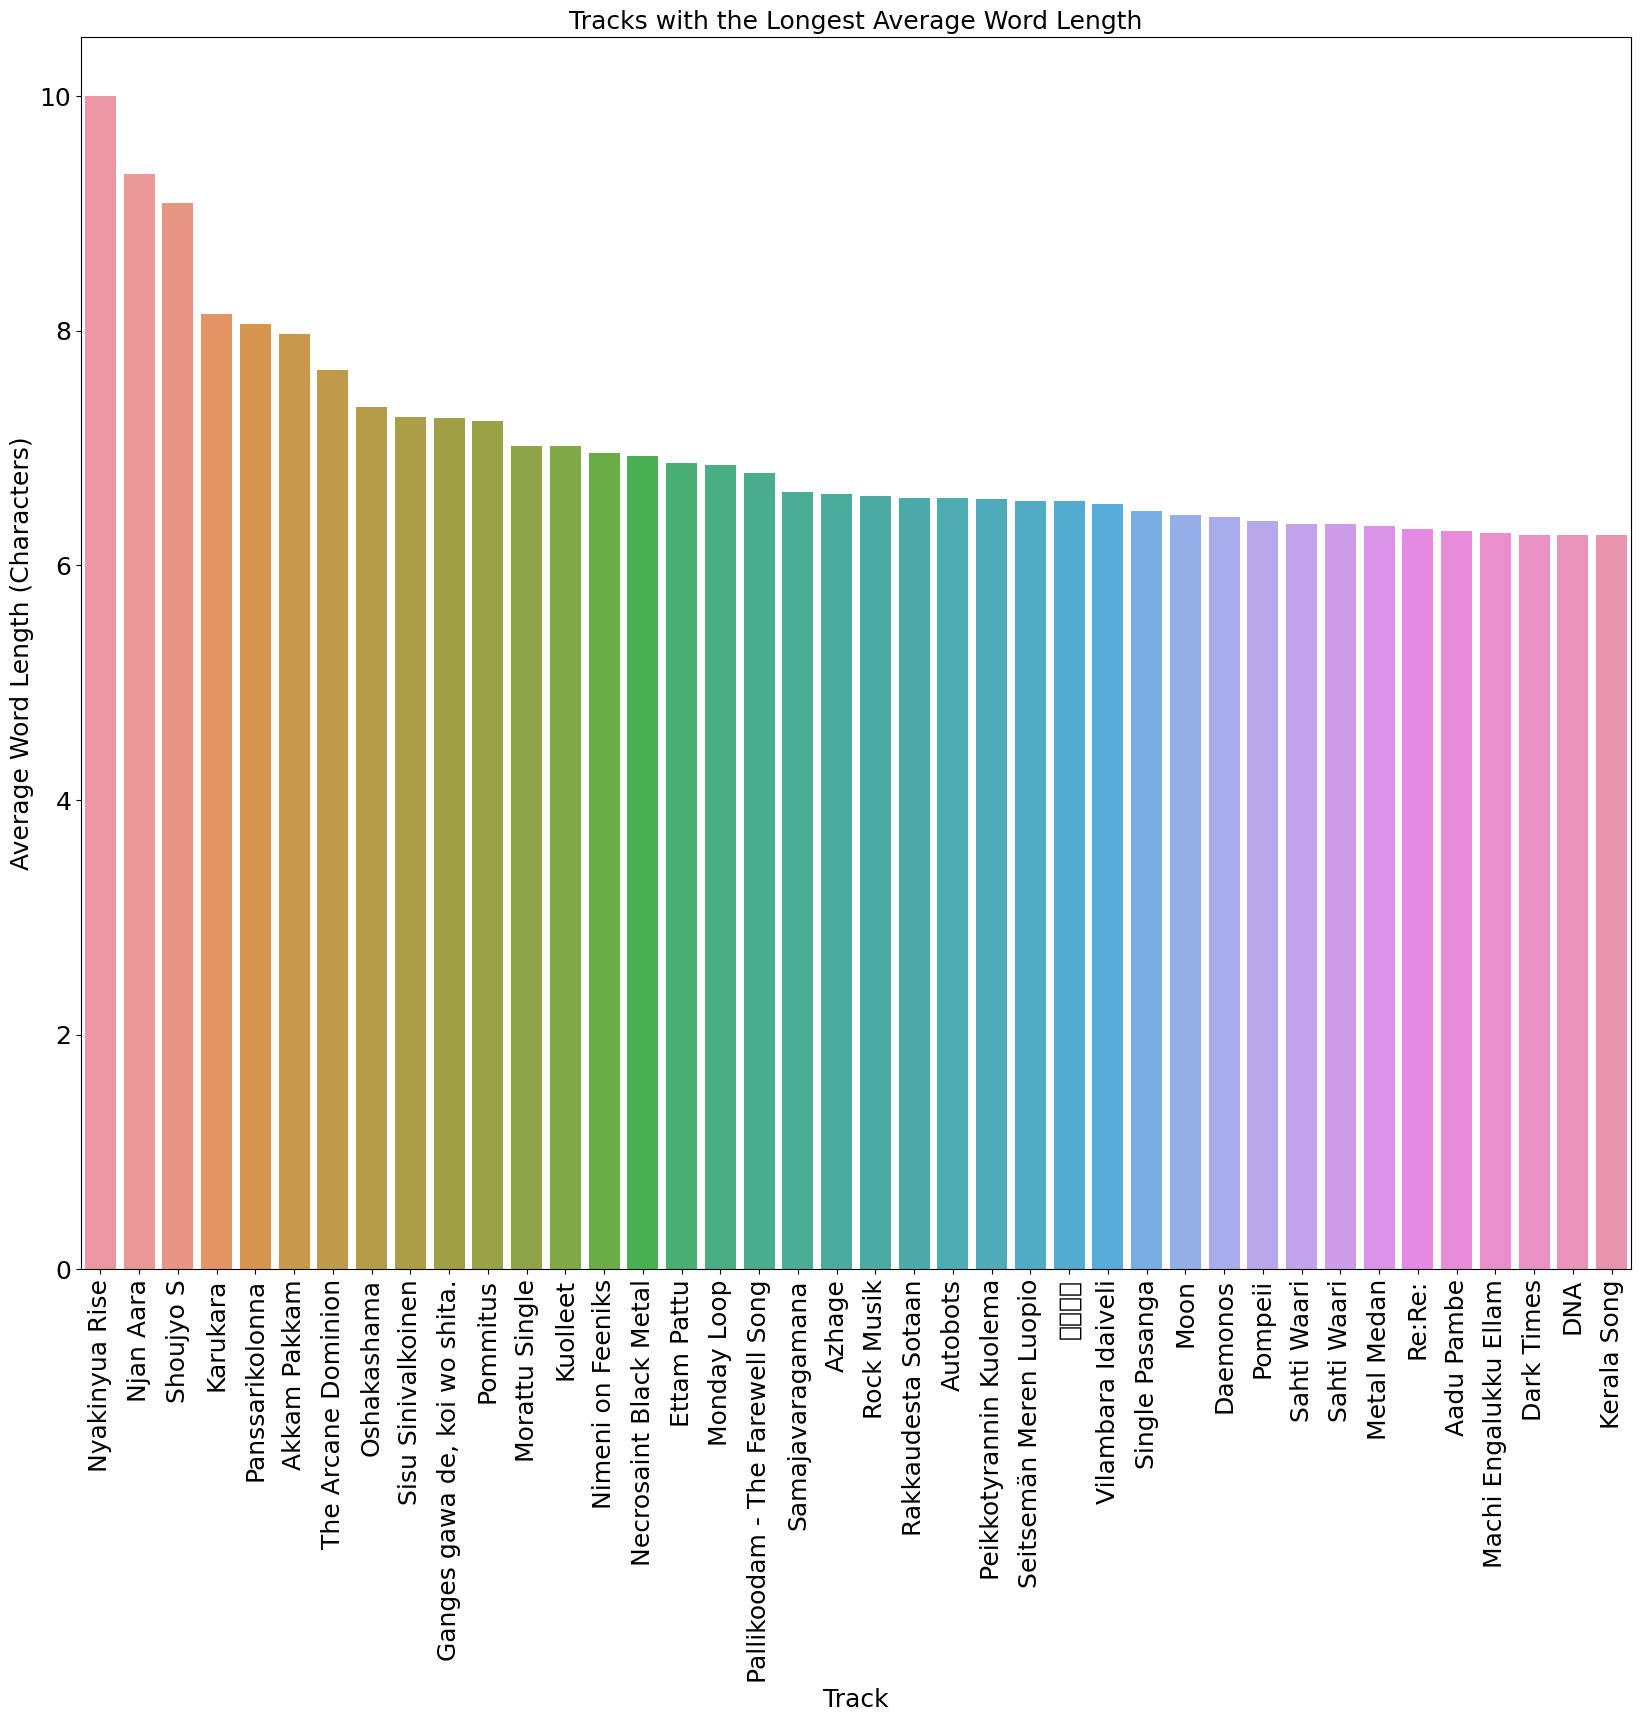

In [11]:
#Plot the songs with the longest average word length

wl_df = df4[["track", "avgWordLength"]].sort_values(by=['avgWordLength'], ascending=False)
wl_df = wl_df.reset_index(drop=True)
wl_df = wl_df.head(40)

plt.figure(figsize=(20,16))
# make barplot and sort bars in descending order
sns.barplot(x='track', 
            y="avgWordLength", 
            data=wl_df, 
            order=wl_df.sort_values('avgWordLength', ascending = False).track)
# set labels
plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Track", size=18)
plt.ylabel("Average Word Length (Characters)", size=18)
plt.title("Tracks with the Longest Average Word Length", size=18)
#plt.savefig('avgWordLength.png')

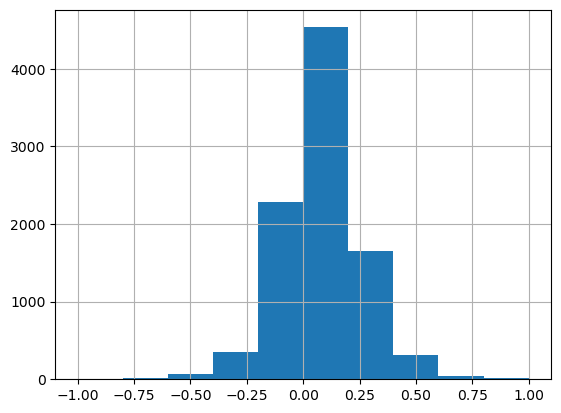

In [12]:
#Create column for the polarity score of the lyrics and plot the polarity distribution
from textblob import TextBlob
    
def TBPolarity(text):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score =text.apply(lambda x : _polarity(x))
    polarity_score.hist()
    
df4['polarity']=df4['lyricsClean'].apply(lambda x:TextBlob(x).sentiment.polarity)
    
polarityScore = TBPolarity(df4['lyrics'])

Text(0.5, 1.0, 'Tracks with the Highest Polarity')

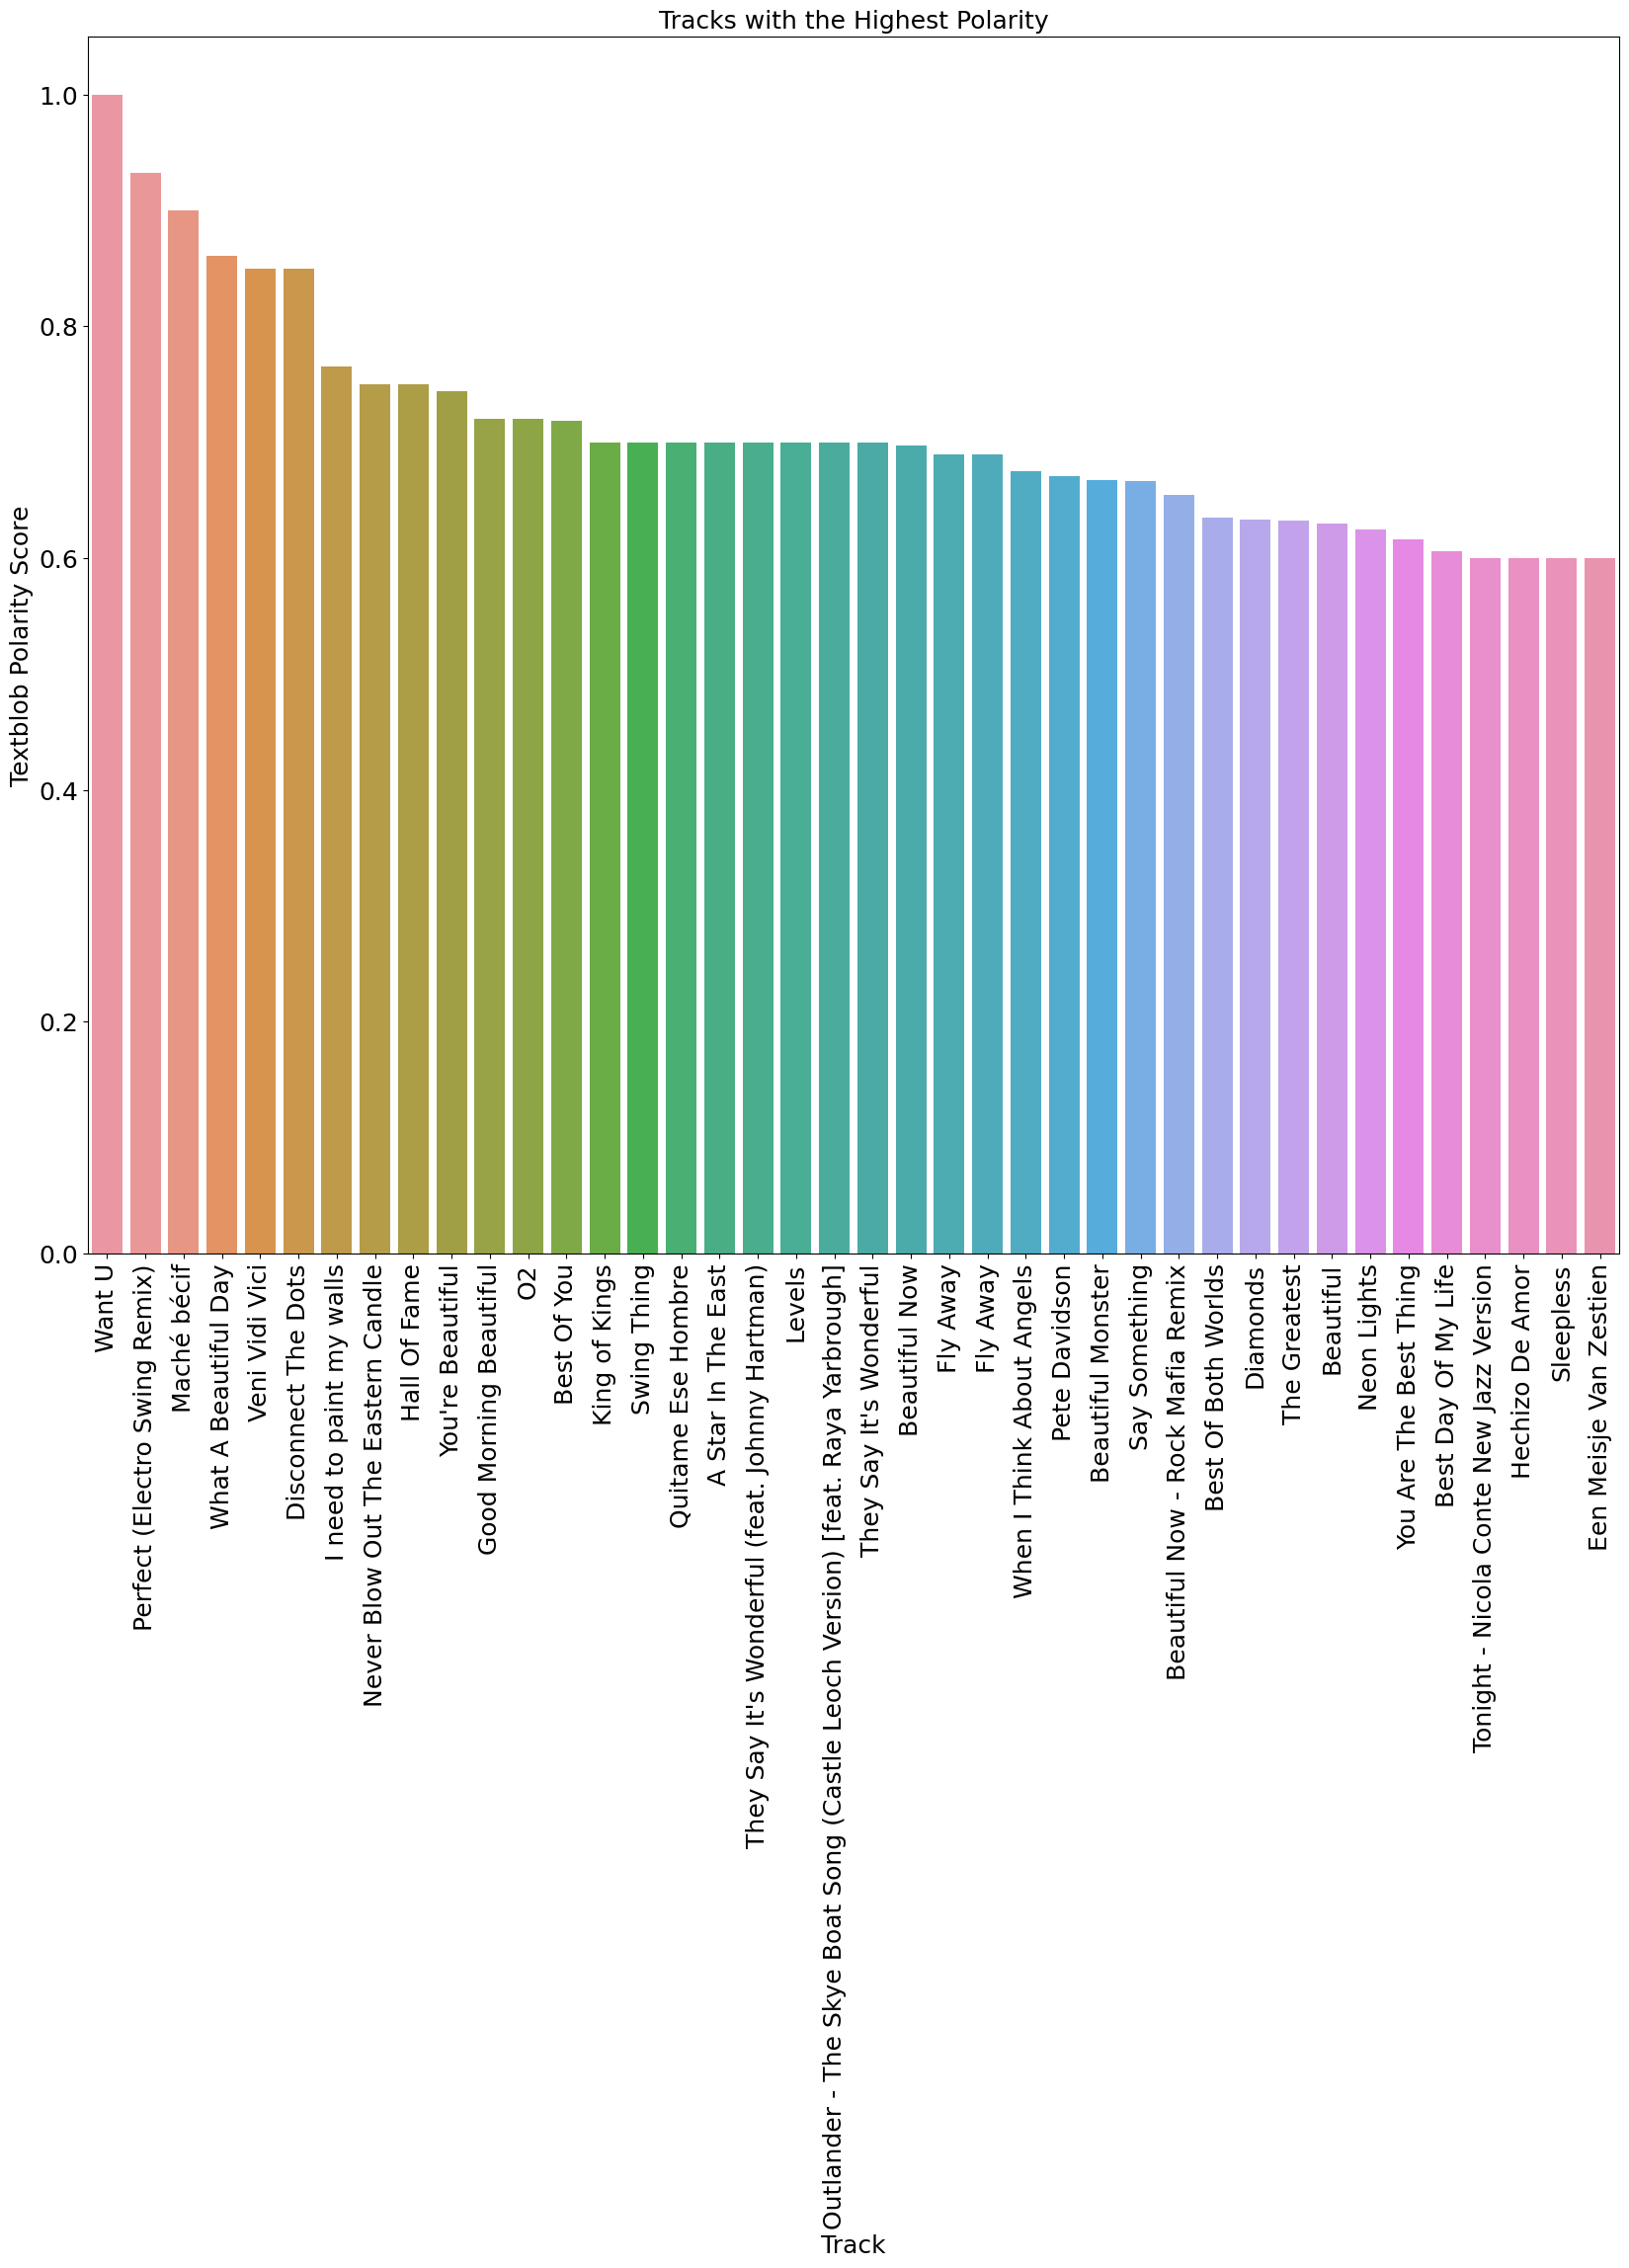

In [13]:
#Plot high polarity tracks

pol_df = df4[["track", "polarity"]].sort_values(by=['polarity'], ascending=False)
pol_df = pol_df.reset_index(drop=True)
pol_df = pol_df.head(40)

plt.figure(figsize=(20,16))

sns.barplot(x='track', 
            y="polarity", 
            data=pol_df, 
            order=pol_df.sort_values('polarity', ascending = False).track)

plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Track", size=18)
plt.ylabel("Textblob Polarity Score", size=18)
plt.title("Tracks with the Highest Polarity", size=18)
#plt.savefig('Highest Polarity.png')

Text(0.5, 1.0, 'Tracks with the Lowest Polarity')

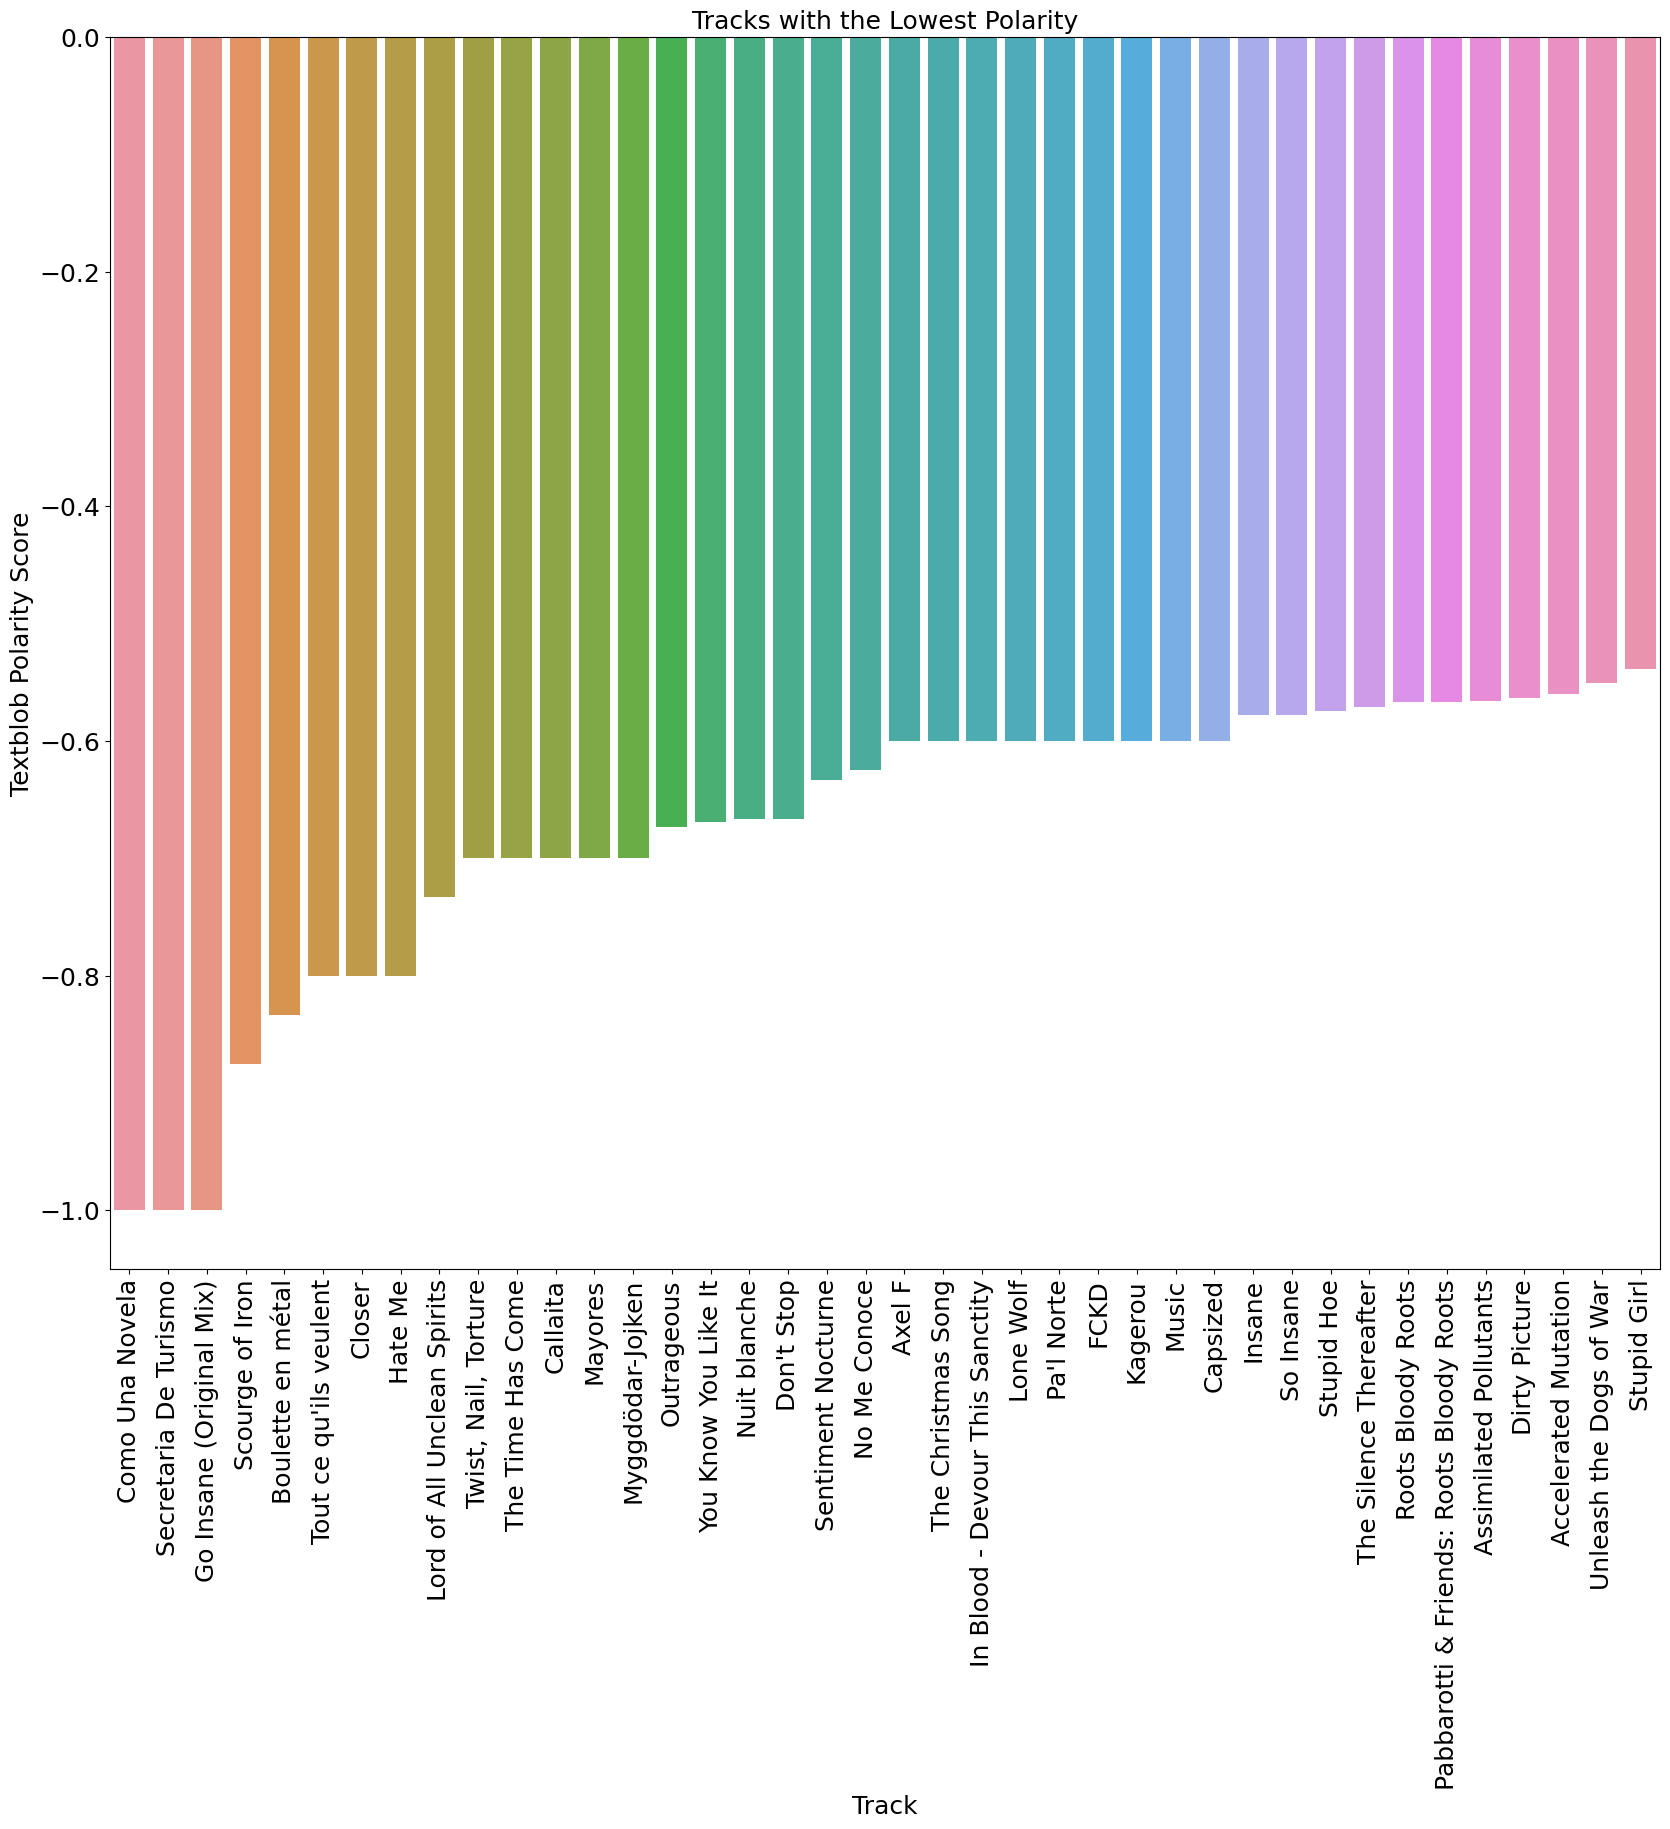

In [14]:
#Plot low polarity tracks

pol_df = df4[["track", "polarity"]].sort_values(by=['polarity'], ascending=True)
pol_df = pol_df.reset_index(drop=True)
pol_df = pol_df.head(40)

plt.figure(figsize=(20,16))

sns.barplot(x='track', 
            y="polarity", 
            data=pol_df, 
            order=pol_df.sort_values('polarity', ascending = True).track)
# set labels
plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Track", size=18)
plt.ylabel("Textblob Polarity Score", size=18)
plt.title("Tracks with the Lowest Polarity", size=18)
#plt.savefig('Lowest Polarity.png')

In [15]:
# Create columns for word count and words per millisecond 
def wordCount(song):
    total_words = len(song.split())
    return total_words

df4["wordCount"] = df4["lyricsClean"].apply(wordCount)
df4["words/duration"] = df4["wordCount"]/df["duration_ms"]

In [16]:
#Create columns to measure songs that are long (temporally and lyrically) and repetitive 
df4["repDuration"] = (df4["Repetitiveness"]*df4["duration_ms"])/100
df4["repWordCount"] = (df4["Repetitiveness"]*df4["wordCount"])/100

In [17]:
# Find unique words throughout the entire song lyric corpus
song_lyrics_list_unique = []
def uniq_words(song):
    indiv_song = song.split()
    for word in indiv_song:
        if word not in song_lyrics_list_unique:
            song_lyrics_list_unique.append(word)
    return

for i in range(df4["lyricsClean"].shape[0]):
    uniq_words(df4["lyricsClean"].iloc[i])
    

print("Number of unique words in all the songs: ",len(song_lyrics_list_unique))

def count_words(song):
    for word in song.split():
        word_freq_dict[word] += 1


word_freq_dict = {}
for word in song_lyrics_list_unique:
    word_freq_dict[word] = 0
    

for i in range(df4["lyricsClean"].shape[0]):
    count_words(df4["lyricsClean"].iloc[i])

s = pd.Series(word_freq_dict, name='Frequency')
s.index.name = 'Word'
s.reset_index()
word_freq_list_df = pd.DataFrame(s).sort_values(by = 'Frequency', ascending = False).reset_index()
word_freq_list_df.head()


Number of unique words in all the songs:  84404


,Word,Frequency
0,i,116680
1,the,114301
2,you,111381
3,and,64342
4,a,63085


In [18]:
# Generating normalised commonness score by taking base 10 logarithm of frequency
# Most common word is 10, Least common is 0
# Stopwords are included because a song which is filled with stopwords would theoretically be less complex

import math

def normalise(score):
    return 10*(score-min_metric)/(max_metric-min_metric)

word_freq_list_df['Commonness Metric'] = word_freq_list_df['Frequency'].apply(math.log10)
max_metric = word_freq_list_df['Commonness Metric'].max()
min_metric = word_freq_list_df['Commonness Metric'].min()

word_freq_list_df['Normalised Commonness Metric'] = word_freq_list_df['Commonness Metric'].apply(normalise)
word_freq_list_df.head()





,Word,Frequency,Commonness Metric,Normalised Commonness Metric
0,i,116680,5.066996,10.000000
1,the,114301,5.058050,9.982344
2,you,111381,5.046811,9.960163
3,and,64342,4.808495,9.489832
4,a,63085,4.799926,9.472922


In [19]:
# Create a column containing the average commonness score across all lyrics in a song
commonness_dict = {}
for i in range(word_freq_list_df.shape[0]):
    commonness_dict[word_freq_list_df['Word'].iloc[i]] = word_freq_list_df['Normalised Commonness Metric'].iloc[i]

def calc_av_word_common_score(song):
    total_words = len(song.split())
    total_score = sum([commonness_dict[a] for a in song.split()])
    return total_score/total_words   


df4['Avg Commonness Score'] = df4['lyricsClean'].apply(calc_av_word_common_score)   

In [20]:
#Preparing lyrics for topic modelling: removing stop words and lemmatizing tokens
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    tokens = [token for token in tokens if not nlp.vocab[token].is_stop]
    processed_text = ' '.join(tokens)
    return processed_text

df4['lyricText'] = df4['lyricsClean'].apply(preprocess_text)


In [21]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

#Running NMF only on hit songs
dfHit = df4[df4['target'] == 1]
dfHit = dfHit.reset_index(drop=True)
dfFlop = df4[df4['target'] == 0]
dfFlop = dfFlop.reset_index(drop=True)

vect = TfidfVectorizer(min_df=50, stop_words='english')
X = vect.fit_transform(dfHit['lyricText'])

# Create an NMF instance: model
# the 6 components will be the topics
model = NMF(n_components=6, random_state=0)
model.fit(X)
nmf_features = model.transform(X)

components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())
components_df.head()

C:\Users\mhgro\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\mhgro\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\mhgro\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,12,20,21,24,30,40,50,act,...,yellow,yep,yes,yesterday,yo,york,young,yous,yup,zone
0,0.008879,0.002401,0.002669,0.011740,0.000000,0.001537,0.000000,0.000000,0.000429,0.042528,...,0.013035,0.004170,0.078325,0.061816,0.000000,0.018111,0.101798,0.001000,0.001147,0.006234
1,0.032343,0.027381,0.029580,0.020266,0.054074,0.025373,0.027101,0.032243,0.049364,0.096263,...,0.031772,0.011270,0.023766,0.000000,0.207527,0.029672,0.169686,0.019900,0.028185,0.029120
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.001111,0.000000,0.000000,0.000000,0.002993,...,0.006321,0.000000,0.040732,0.000000,0.010414,0.004760,0.015438,0.000855,0.002197,0.000000
3,0.005377,0.003205,0.000321,0.000000,0.003970,0.000000,0.000000,0.000000,0.002488,0.013970,...,0.000000,0.000000,0.036883,0.000000,0.000000,0.000000,0.004001,0.002728,0.001890,0.000000
4,0.000708,0.000749,0.000280,0.002385,0.014982,0.001413,0.000000,0.004145,0.003833,0.002751,...,0.000000,0.000102,0.000000,0.000352,0.289775,0.015892,0.000000,0.000000,0.000000,0.000000


In [23]:
#Print the most impactful words per topic
#Beware of some profanity below

for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
know     1.216194
ve       0.911989
time     0.803097
feel     0.729017
like     0.721947
ill      0.712021
think    0.682409
come     0.650075
life     0.629061
let      0.613221
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
bitch     1.063399
nigga     0.978763
like      0.812499
fuck      0.730738
shit      0.711217
niggas    0.650451
money     0.456042
ayy       0.447168
em        0.416457
gon       0.385072
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
oh      2.915765
like    0.178729
whoa    0.178073
ohoh    0.148346
feel    0.105477
let     0.098752
woah    0.093024
ooh     0.092529
hey     0.090992
ah      0.086237
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
love     3.195465
baby     0.404906
heart    0.232359
know     0.211741
way      0.195848
need     0.169830
want     0.162322
feel     0.144903
tell     0.127923
ill      0.108823
Na

In [24]:
#Create a dataframe for the topic distributions of each song in dfHit

nmfFeaturesDF = pd.DataFrame(data=nmf_features, columns=["topic 1", "topic 2", "topic 3", "topic 4", "topic 5", "topic 6"])
nmfFeaturesDF.head()

,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6
0,0.015851,0.000000,0.007341,0.000000,0.000181,0.000000
1,0.049588,0.000000,0.000000,0.004673,0.000000,0.051563
2,0.060789,0.007564,0.003006,0.000000,0.000000,0.008678
3,0.069395,0.011689,0.021243,0.000320,0.000000,0.048793
4,0.023381,0.002714,0.017994,0.096224,0.000785,0.001654


In [25]:
#Create a merged dataframe containing NMF features in addition to all the other features
dfHitNLP = pd.merge(dfHit, nmfFeaturesDF, left_index=True, right_index=True)

X = vect.transform(dfFlop['lyricText'])
nmf_featuresFlop = model.transform(X)
 
nmfFeaturesDFFlop  = pd.DataFrame(nmf_featuresFlop, columns=["topic 1", "topic 2", "topic 3", "topic 4", "topic 5", "topic 6"])

dfFlopNLP = pd.merge(dfFlop, nmfFeaturesDFFlop, left_index=True, right_index=True)

dfNLP = pd.concat([dfHitNLP, dfFlopNLP], ignore_index=True, sort=True)

In [26]:
#export new dataframe to CSV
dfNLP.to_csv('merged_00s_10s-with-NLPFeatures.csv')

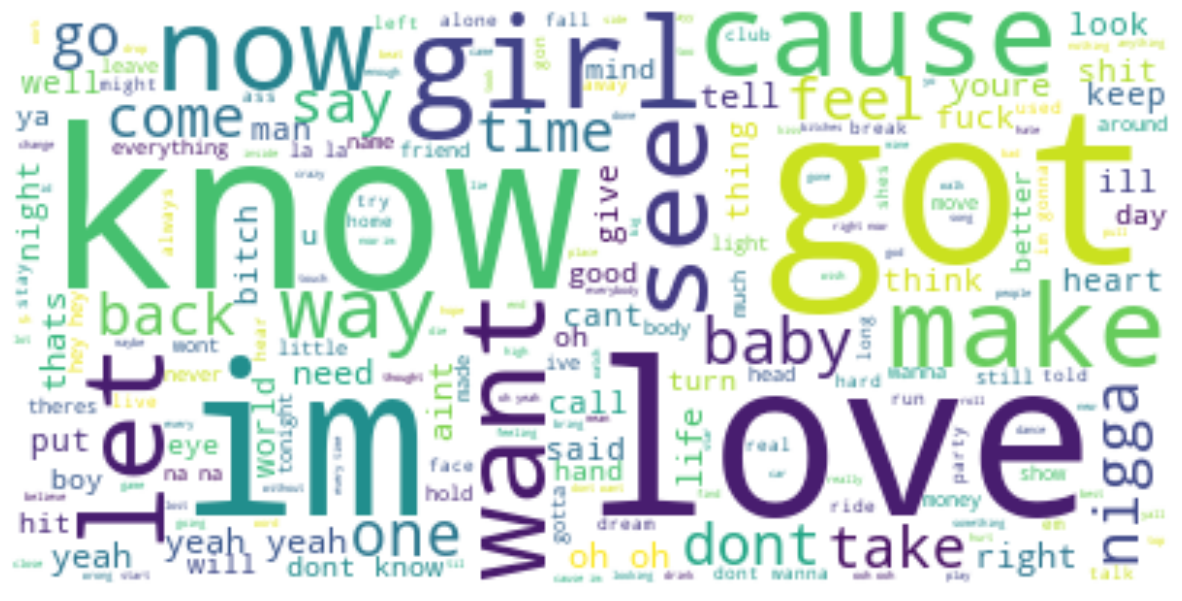

In [29]:
#Make word clouds for hit songs, flops, and combined
from wordcloud import WordCloud, STOPWORDS


word_cloud_hits = df4[df4['target']==1]['lyricsClean'].values
str1 = ' '.join(word_cloud_hits)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(str1))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

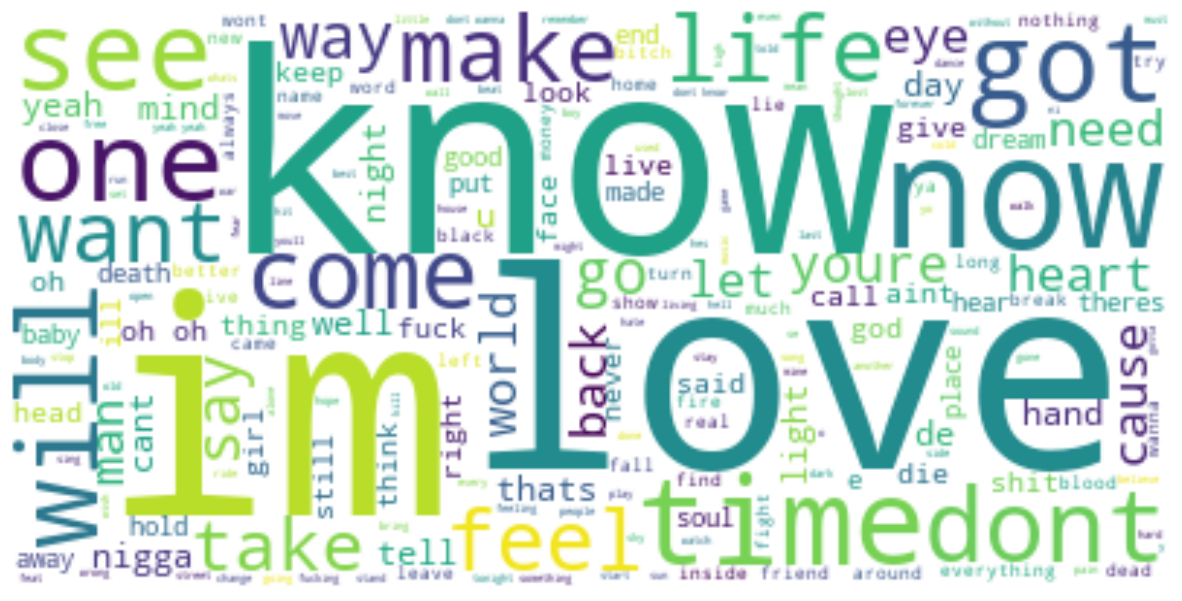

In [30]:
word_cloud_hits = df4[df4['target']==0]['lyricsClean'].values
str1 = ' '.join(word_cloud_hits)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(str1))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

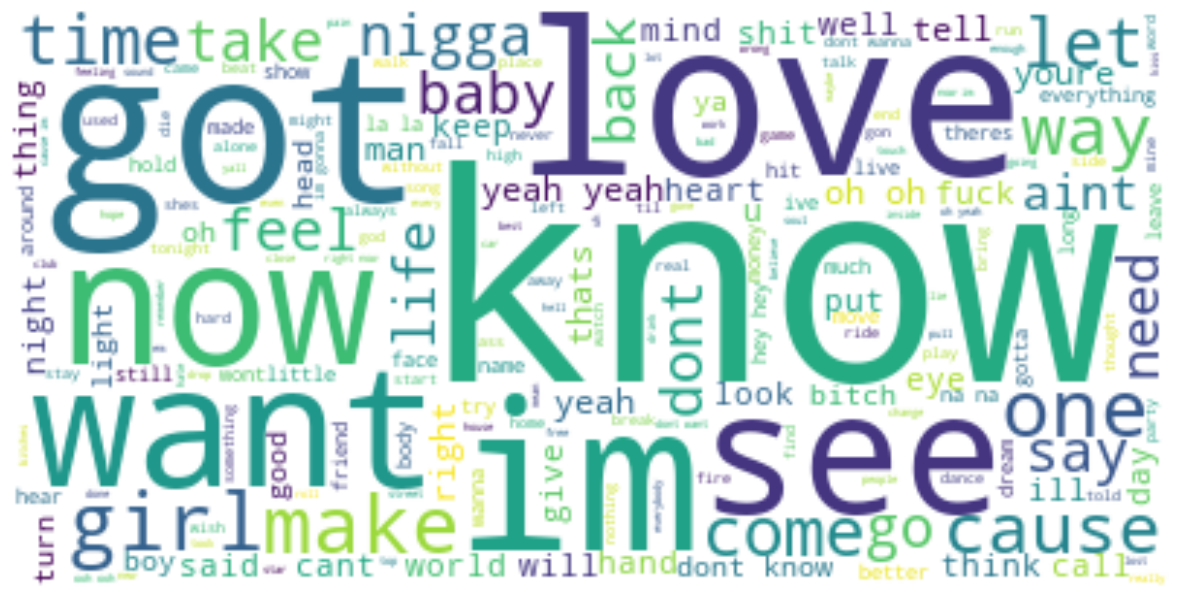

In [31]:
word_cloud_hits = df4['lyricsClean'].values
str1 = ' '.join(word_cloud_hits)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(str1))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()